In [ ]:
import numpy as np
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from math import sin
from random import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_max = 102

# Задаем ряд
price_ser_src = pd.Series([sin(x) + 10*random() for x in range(1, n_max)])
# p_ser = price_ser_src[::5]

# Находим mu (тренд)
# Простой способ -- первая разность
mu_arr = np.array([price_ser_src[i]-price_ser_src[i-1] if i > 0 else 0. for i in range(len(price_ser_src)) ])

# Находим параметры ARMA (подгоняем модель)
model = ARIMA(price_ser_src, order=(4, 0, 4))
model_fit = model.fit()
print(model_fit.summary())

# make prediction -- это пока вообще не трогаем
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

# График
plt.title("Временной ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(price_ser_src)
plt.plot(mu)

# p_ser.reset_index(inplace=True, drop=True)
# p_ser

mu_arr


[100] [ 0.          4.93661602 -6.94555685  5.51133476 -2.6136152  -6.3122342
  9.2652126   1.13218701 -4.60947531 -4.9102078   4.01392284  1.63095175
  3.53282766 -5.73610255  4.99982393 -0.71256602 -3.08118211 -0.62823583
  2.95588038 -4.01554104  5.17361141 -2.42335534 -5.77338615  7.89919057
 -3.95462933  3.76589476  0.87091957 -3.55893294  3.55478806 -4.38187051
 -4.11959746  4.85886059  2.45743165 -2.18248354  1.21904864 -7.97322778
  6.50740715  2.72378382  0.61620652 -0.4895849  -4.46117371  1.58080264
 -0.10015959 -0.55120481  1.92391183 -3.57336189  4.65960567 -7.30974524
  3.34932052 -0.67692807  6.042964   -5.36396967  2.3195308  -2.55941504
  0.98386613 -2.2484423  -0.9307761   7.56969091 -5.6041454   4.10985328
 -2.56373074 -1.53283924  2.1398372  -3.08599501  0.23331556 -0.90792972
  0.99328529  4.93884976 -6.69831487  9.01511134 -2.90676892 -4.99915132
  0.3222614  -3.43798077  7.04359151  0.62499175  1.50892659 -3.63502796
  1.40756069 -3.02311087 -0.37282691  6.566816

(array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
         -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
         -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
         -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
         -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
         -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
         -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
         -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
         -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
         -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
         -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
         -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
         -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
          0.50505051,   0.70707071,   0.90909091,   1.11111111,
          1.31313131,   1.51515152,   1.71717172,   1.91919192,
          2.12121212,   2.32323232,   2.

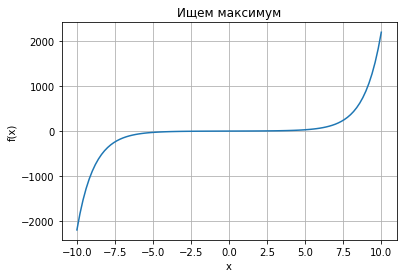

In [2]:
from scipy.optimize import minimize, minimize_scalar
import math
import functools


def math_exp(K: float, inv: float, mu: float, i: int):
    res = -inv/K * (math.exp(K*mu*i) + math.exp(-K*mu*i) - 2) 
    return res

def f(x):
    mu = 1
    t = 1
    return -1/x*(math.exp(x*mu*t) + math.exp(-x*mu*t) - 2)





# Считаем алгоритм

inv_0 = 100
inv_ser = [inv_0]

"""
for cnt, price in enumerate(price_ser_src):
    if cnt == 0:
        continue
    f = functools.partial(math_exp, inv = inv_ser[cnt-1], mu = mu[cnt-1], i=cnt-1)    
    K = minimize_scalar(f, bounds=(-1, 1), method='bounded', ).x
    inv_ser.append(K)
    
inv_ser
"""
print(inv_ser, mu_arr)


x_arr = np.linspace(-10, 10., 100)
f_arr = np.array([f(x_arr[i]) for i in range(len(x_arr))])



# f = functools.partial(math_exp, inv = 10, mu = 1, i=1)    
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("f(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)

x_arr, f_arr









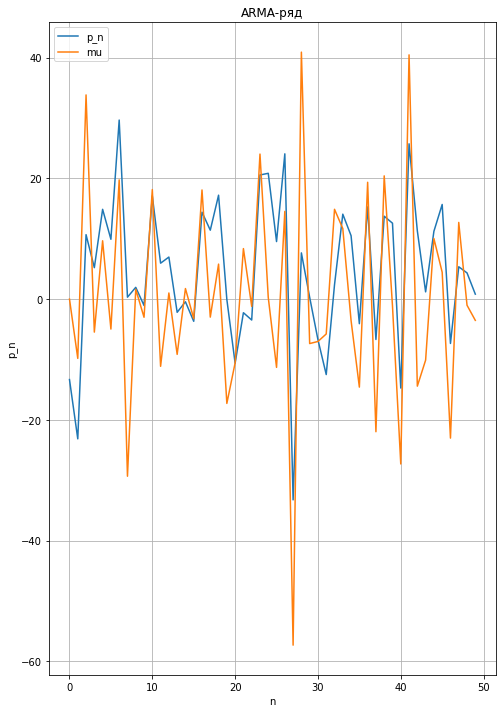

(array([-13.32920183, -23.14762468,  10.67691137,   5.21030925,
         14.87343885,   9.91135351,  29.66119461,   0.32022997,
          1.95065539,  -1.05723653,  17.08478179,   5.95192255,
          6.96718624,  -2.18617188,  -0.43717594,  -3.67635645,
         14.40284818,  11.41889618,  17.21603271,  -0.06274363,
        -10.62072846,  -2.25229746,  -3.4622302 ,  20.56364262,
         20.84081366,   9.53251501,  24.06618155, -33.25698985,
          7.65686703,   0.29298727,  -6.72380415, -12.49744108,
          2.37974383,  14.07083263,  10.50528965,  -4.07265501,
         15.2798353 ,  -6.68636346,  13.72978992,  12.57622696,
        -14.73317092,  25.72789281,  11.3091904 ,   1.20041879,
         11.23231636,  15.67889225,  -7.34603024,   5.3576971 ,
          4.33993663,   0.82101919]),
 array([  0.        ,  -9.81842285,  33.82453605,  -5.46660212,
          9.6631296 ,  -4.96208534,  19.7498411 , -29.34096464,
          1.63042543,  -3.00789193,  18.14201832, -11.13285923,
  

In [105]:
# Генерируем и визуализируем ARMA(4,4)-ряд


import random

n_max = 50

a = [10., 8., 6., 2., .1]
d = [1., .6, .4, .1, .06]

p = [-1., 3., .1, -.8, .5]
for i in range(5, n_max+5):
    p_next = a[0]*p[4] + a[1]*p[3] + a[2]*p[2] + a[3]*p[1] + a[4]*p[0]
    xi = np.random.normal(0., 10., 5)
    p_next += sum([d[i]*xi[i] for i in range(5)])
    p.append(p_next)
    
p_arr = np.array(p[5:])
mu_arr = np.diff(p_arr)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr = np.append(0., mu_arr)

n_lst = list(range(n_max))

figure = plt.figure(figsize=(8, 12))
plt.title("ARMA-ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr, mu_arr)
plt.legend(['p_n', 'mu'], loc="upper left")

plt.show()
p_arr, mu_arr 


## Alg0 v.0.1 
Работает только для положительных I_0, K всегда положительно или равно 0
При отрицательных I_0 K всегда отрицательно или равно 0
Нет смены знака

dt = 0.01
t=-2	 I=10.0	 mu=0.0	 g=0.0 	 K=0.0 -> Nothing
t=-1	 I=10.0	 mu=0.0	 g=0.0 	 K=0.0 -> Nothing
iter=1, t=0.01, I=10.0, mu=-0.9818 g=-0.0279, K=10.0 -> Buy   I/K=1.0
iter=2, t=0.02, I=9.721, mu=3.3825 g=0.0658, K=10.0 -> Buy   I/K=0.97
iter=3, t=0.03, I=10.379, mu=-0.5467 g=0.021, K=10.0 -> Buy   I/K=1.04
iter=4, t=0.04, I=10.5891, mu=0.9663 g=-0.0713, K=10.0 -> Buy   I/K=1.06
iter=5, t=0.05, I=9.8759, mu=-0.4962 g=-0.2565, K=10.0 -> Buy   I/K=0.99
iter=6, t=0.06, I=7.3112, mu=1.975 g=0.2064, K=10.0 -> Buy   I/K=0.73
iter=7, t=0.07, I=9.3751, mu=-2.9341 g=0.0756, K=10.0 -> Buy   I/K=0.94
iter=8, t=0.08, I=10.1307, mu=0.163 g=-0.1337, K=10.0 -> Buy   I/K=1.01
iter=9, t=0.09, I=8.7932, mu=-0.3008 g=0.0657, K=10.0 -> Buy   I/K=0.88
iter=10, t=0.1, I=9.4505, mu=1.8142 g=-0.151, K=10.0 -> Buy   I/K=0.95
iter=20, t=0.2, I=5.9658, mu=-1.0558 g=0.123, K=10.0 -> Buy   I/K=0.6
iter=30, t=0.3, I=20.315, mu=-0.7017 g=0.0791, K=10.0 -> Buy   I/K=2.03
iter=40, t=0.4, I=27.4476, mu=-2.7309 g=

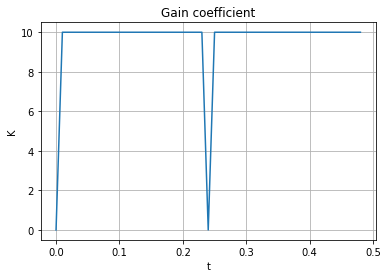

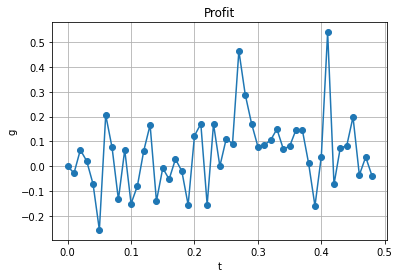

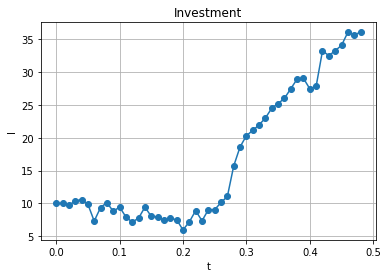

In [115]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


# Ограничения на K
k_min = -10
k_max = 10
# Массивы
t_max = float(n_max)/100
t_arr = np.linspace(0., t_max, n_max + 1)
dt = t_arr[1]-t_arr[0]
print('dt =', dt)
k_arr = np.zeros(n_max+1)
g_arr = np.zeros(n_max+1)
inv_arr = np.zeros(n_max+1)


# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t)
# inv_arr[0], xi = 10, lambda: 0 
# 2. I_0 < 0, g(t) = Eg(t)
# inv_arr[0], xi = -10, lambda: 0
# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум)
inv_arr[0], xi = 10, lambda: .1*np.random.normal(0, 1)






# print(t_arr, k_arr, g_arr, inv_arr)






# Задаем начальную инвестицию и профит
tm2, invm2, mum2, gm2, Km2,  = -2, inv_arr[0], 0., 0., 0.
if Km2 > 0:
    desm2 = 'Buy'
elif Km2 < 0:
    desm2 = 'Sell'
else:
    desm2 = 'Nothing'
print(f't={tm2}\t I={invm2}\t mu={mum2}\t g={gm2} \t K={Km2} -> {desm2}')

tm1, invm1, Km1, gm1, mum1 = -1, inv_arr[0], 0., 0., 0.
if Km1 > 0:
    desm1 = 'Buy'
elif Km1 < 0:
    desm1 = 'Sell'
else:
    desm1 = 'Nothing'
print(f't={tm1}\t I={invm1}\t mu={mum1}\t g={gm1} \t K={Km1} -> {desm1}')


def minus_eg(k, _inv, _mu, _delta_t):
    res = -_inv/k*(math.exp(k*_mu*_delta_t) + math.exp(-k*_mu*_delta_t) - 2.)
    return res
    
    
for i in range(n_max-1):
    des_str = ''
    if fabs(mu_arr[i]) <= 1:
        k_arr[i] = 0.
        g_arr[i] = 0.
        des_str = 'Nothing'
        inv_arr[i+1] = inv_arr[i] 
    else:
        # mu_sign = mu_arr[i]/fabs(mu_arr[i])
        mu_normalized = mu_arr[i]/10
        minus_eg_cur = functools.partial(minus_eg, _inv=inv_arr[i], _mu = mu_normalized, _delta_t=dt)
        k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
        k_arr[i] = k_cur
        g_arr[i] = -minus_eg_cur(k_cur) + xi()
        # g_test = calc_eg(k_cur, inv_arr[i], mu_sign, dt)
        inv_arr[i+1] = inv_arr[i] + k_arr[i]*g_arr[i]
    
        """    
        if i == 1:
            print('I =', inv_arr[i], 'mu =', mu_sign, 'dt =', dt, 'I/K=', inv_arr[i]/k_arr[i], 'g_test=', g_test)
            
            
            
            x_arr = np.linspace(k_min, k_max, 100)
            f_arr = np.array([calc_eg_cur(x_arr[counter]) for counter in range(len(x_arr))])
            plt.title("Ищем максимум") # заголовок
            plt.xlabel("x") # ось абсцисс
            plt.ylabel("eg0(x)") # ось ординат
            plt.grid()      # включение отображение сетки
            # plt.plot(p_ser)  # построение графика
            plt.plot(x_arr, -f_arr) 
            plt.show()
        """    
        if k_cur >= 0:
            des_str = 'Buy'
        else:
            des_str = 'Sell'    
        if i < 10 or i % 10 == 0:
            print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(inv_arr[i], 4)}, mu={round(mu_normalized, 4)}',
            f'g={round(g_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(inv_arr[i]/k_arr[i], 2)}')    

k_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
g_ser = pd.Series(g_arr[:-2], index=t_arr[:-2])
inv_ser = pd.Series(inv_arr[:-2], index=t_arr[:-2])

plt.plot(k_ser[:n_max-2])
plt.xlabel("t")
plt.ylabel("K")
plt.title("Gain coefficient")
plt.grid() 
plt.show()

plt.plot(g_ser[:n_max-2], marker='o')
plt.xlabel("t")
plt.ylabel("g")
plt.title("Profit")
plt.grid() 
plt.show()

plt.plot(inv_ser[:n_max-2], marker='o')
plt.xlabel("t")
plt.ylabel("I")
plt.title("Investment")
plt.grid() 
plt.show()




"""
t0, inv0, mu0 = 0, 50., mu_arr[0]
def eg0(k):
    _t = 0
    # Ставим -, потому что технически ищем минимум, а на самом деле нужен максимум
    if mu_ser[0]>0:
        _mu = 1
    else:
        _mu = -1
    res = -inv0/k*(math.exp(k*_mu*_t) + math.exp(-k*_mu*_t) - 2.)
    return res
K0 = minimize_scalar(eg0, bounds=(k_min, k_max), method='bounded').x
g0 = eg0(K0)
if K0 > 0:
    des0 = 'Buy'
elif K0 < 0:
    des0 = 'Sell'
else:
    des0 = 'Nothing'
print(f't={t0}\t I={inv0}\t mu={mu0}\t g={g0}\t K={K0} -> {des0}')
x_arr = np.linspace(k_min, k_max, 100)
f_arr = np.array([eg0(x_arr[i]) for i in range(len(x_arr))])
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("eg0(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)    

t1, inv1, mu1 = 1, inv0 + K0*g0, mu_ser[1]
plt.show()
def eg1(k):
    _t = 1
    if mu1>0:
        _mu = 1
    else:
        _mu = -1
    # Ставим -, потому что технически ищем минимум, а на самом деле нужен максимум
    res = -inv1/k*(math.exp(k*_mu*_t) + math.exp(-k*_mu*_t) - 2.)
    return res
K1 = minimize_scalar(eg1, bounds=(k_min, k_max), method='bounded').x
g1 = eg1(K1)
if K1 > 0:
    des1 = 'Buy'
elif K1 < 0:
    des1 = 'Sell'
else:
    des1 = 'Nothing'
print(f't={t1}\t I={inv1}\t mu={mu1}\t g={g1}\t K={K1} -> {des1}')
f_arr = np.array([eg1(x_arr[i]) for i in range(len(x_arr))])
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("eg1(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)    
plt.show()

t2, inv2, mu2 = 2, inv1 + K1*g1, mu_ser[2]
def eg2(k):
    _t = 1
    _mu = mu2
    if mu2>0:
        _mu = 1
    else:
        _mu = -1
    # Ставим -, потому что технически ищем минимум, а на самом деле нужен максимум
    res = -inv2/k*(math.exp(k*_mu*_t) + math.exp(-k*_mu*_t) - 2.)
    return res
K2 = minimize_scalar(eg2, bounds=(k_min, k_max), method='bounded').x
g2 = eg2(K2)
if K2 > 0:
    des2 = 'Buy'
elif K2 < 0:
    des2 = 'Sell'
else:
    des2 = 'Nothing'
print(f't={t2}\t I={inv2}\t mu={mu2}\t g={g2}\t K={K2} -> {des2}')
f_arr = np.array([eg2(x_arr[i]) for i in range(len(x_arr))])
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("eg2(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)    
plt.show()
"""




# TODO -- теперь сделать это в цикле и посчитать сумму всех I(t) -- сколько по итогам работы алгоритма клиент 
# заработал или потерял





"""
t=0
inv1 = 50.
g1 = 0
K1 = 0
print(f't={t}\t I={inv0}\t K=any \t g=any')

# Теперь первое
# K1 и g1 нули
# inv1 = inv0
t=1
inv2 = inv1 + K1*g1
print(f't={t}\t I={inv1}\t K={K1} \t g={g1}')

# Теперь второе
t=2
# inv3 = inv2 + k3*g2
#k3 = arg max(eg3(k, t=2)) на отрезке K_min, Kmax


K3 = minimize_scalar(eg3, bounds=(k_min, k_max), method='bounded')
print(f't={t}\t I={inv2}\t K=any \t g={g0}')

x_arr = np.linspace(k_min, k_max, 100)
f_arr = np.array([eg3(x_arr[i]) for i in range(len(x_arr))])
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("eg3(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)    

print(K3)

K2 = 0
inv3 = inv2 + K2*g2 

# Для нахождения k оптимизируем матожидание g (gain, выигрыш)
# eg(1) - ?
    
"""

pass


t=1	 I=50	 mu=10	 g=-1.3439701709104485e+44	 K=9.99999335625205


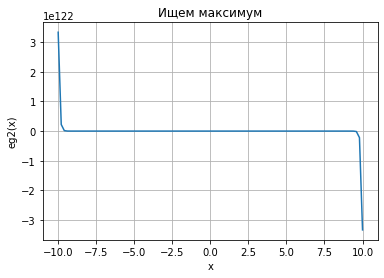

In [150]:
def eg(k):
    _t = 1.
    _mu = 10.
    # Ставим -, потому что технически ищем минимум, а на самом деле нужен максимум
    res = -50./k*(math.exp(k*_mu*_t) + math.exp(-k*_mu*_t) - 2.)
    return res


K = minimize_scalar(eg, bounds=(k_min, k_max), method='bounded').x
g = eg(K)
print(f't={1}\t I={50}\t mu={10}\t g={g}\t K={K}')
f_arr = np.array([eg2(x_arr[i]) for i in range(len(x_arr))])
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("eg2(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)    
plt.show()




In [38]:
def calc_eg(k, _inv, _mu, _delta_t):
    print('k=', k)
    print('inv =', _inv)
    print('mu=', _mu)
    print('delta_t=', _delta_t)
    
    res = -_inv/k*(math.exp(k*_mu*_delta_t) + math.exp(-k*_mu*_delta_t) - 2.)
    return res



calc_eg(10, 50, 1, 1)





k= 10
inv = 50
mu= 1
delta_t= 1


-110122.32920103325

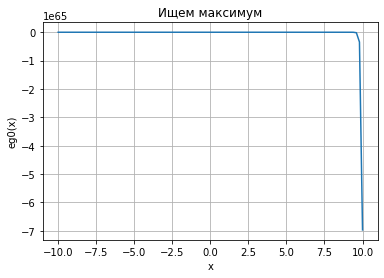

In [81]:
from math import sinh


def e_hyperbolic(inv, mu, K, t):
    alpha = mu*K/2
    beta = mu*K/2
    res = mu * inv * exp(-mu*K*t) * (exp(mu*K*t)*sinh(alpha*t)/alpha - sinh(beta*t)/beta)
    return res


x_arr = np.linspace(k_min, k_max, 100)
f_arr = np.array([e_hyperbolic(50, -1, x_arr[counter], 10) for counter in range(len(x_arr))])
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("eg0(x)") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x_arr, -f_arr) 
plt.show()


In [113]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


# Ограничения на K
k_min = -10
k_max = 10
# Массивы
t_max = float(n_max)/100
t_arr = np.linspace(0., t_max, n_max + 1)
dt = t_arr[1]-t_arr[0]
print('dt =', dt)
k_arr = np.zeros(n_max+1)
g_arr = np.zeros(n_max+1)
inv_arr = np.zeros(n_max+1)

# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t)
inv_arr[0], xi = 10, lambda: 0 
# 2. I_0 < 0, g(t) = Eg(t)
# inv_arr[0], xi = -10, lambda: 0
# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум)
# inv_arr[0], xi = 10, lambda: np.random.normal(0, 1)

# Задаем начальную инвестицию и профит
tm2, invm2, mum2, gm2, Km2,  = -2, inv_arr[0], 0., 0., 0.
if Km2 > 0:
    desm2 = 'Buy'
elif Km2 < 0:
    desm2 = 'Sell'
else:
    desm2 = 'Nothing'
print(f't={tm2}\t I={invm2}\t mu={mum2}\t g={gm2} \t K={Km2} -> {desm2}')

tm1, invm1, Km1, gm1, mum1 = -1, inv_arr[0], 0., 0., 0.
if Km1 > 0:
    desm1 = 'Buy'
elif Km1 < 0:
    desm1 = 'Sell'
else:
    desm1 = 'Nothing'
print(f't={tm1}\t I={invm1}\t mu={mum1}\t g={gm1} \t K={Km1} -> {desm1}')


def minus_eg(k, _inv, _mu, _delta_t):
    res = -_inv/k*(math.exp(k*_mu*_delta_t) + math.exp(-k*_mu*_delta_t) - 2.)
    return res
    
    
for i in range(n_max-1):
    des_str = ''
    if fabs(mu_arr[i]) <= 1:
        k_arr[i] = 0.
        g_arr[i] = 0.
        des_str = 'Nothing'
        inv_arr[i+1] = inv_arr[i] 
    else:
        # mu_sign = mu_arr[i]/fabs(mu_arr[i])
        mu_normalized = mu_arr[i]/10
        minus_eg_cur = functools.partial(minus_eg, _inv=inv_arr[i], _mu = mu_normalized, _delta_t=dt)
        k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
        k_arr[i] = k_cur
        g_arr[i] = -minus_eg_cur(k_cur) + xi()
        # g_test = calc_eg(k_cur, inv_arr[i], mu_sign, dt)
        inv_arr[i+1] = inv_arr[i] + k_arr[i]*g_arr[i]
        if k_cur >= 0:
            des_str = 'Buy'
        else:
            des_str = 'Sell'    
        if i < 10 or i % 10 == 0:
            # print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(inv_arr[i], 4)}, mu={round(mu_normalized, 4)}',
            # f'g={round(g_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(inv_arr[i]/k_arr[i], 2)}')    

k_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
g_ser = pd.Series(g_arr[:-2], index=t_arr[:-2])
inv_ser = pd.Series(inv_arr[:-2], index=t_arr[:-2])

plt.plot(k_ser[:n_max-2])
plt.xlabel("t")
plt.ylabel("K")
plt.title("Gain coefficient")
plt.grid() 
plt.show()

plt.plot(g_ser[:n_max-2], marker='o')
plt.xlabel("t")
plt.ylabel("g")
plt.title("Profit")
plt.grid() 
plt.show()

plt.plot(inv_ser[:n_max-2], marker='o')
plt.xlabel("t")
plt.ylabel("I")
plt.title("Investment")
plt.grid() 
plt.show()

IndentationError: expected an indented block after 'if' statement on line 72 (2555729974.py, line 76)

dt = 0.01
t=-2	 I=10.0	 mu=0.0	 g=0.0 	 K=0.0 -> Nothing
t=-1	 I=10.0	 mu=0.0	 g=0.0 	 K=0.0 -> Nothing


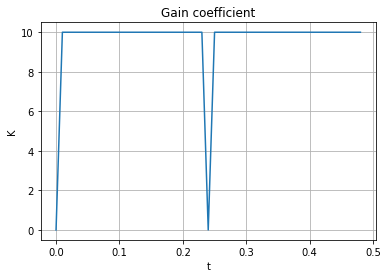

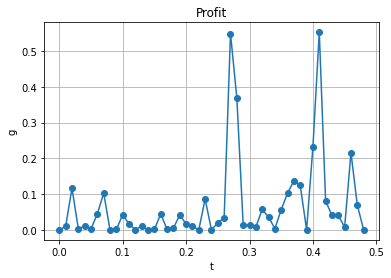

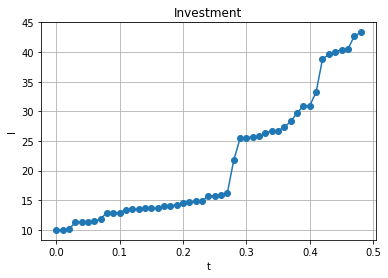

In [114]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


# Ограничения на K
k_min = -10
k_max = 10
# Массивы
t_max = float(n_max)/100
t_arr = np.linspace(0., t_max, n_max + 1)
dt = t_arr[1]-t_arr[0]
print('dt =', dt)
k_arr = np.zeros(n_max+1)
g_arr = np.zeros(n_max+1)
inv_arr = np.zeros(n_max+1)

# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t)
inv_arr[0], xi = 10, lambda: 0 
# 2. I_0 < 0, g(t) = Eg(t)
# inv_arr[0], xi = -10, lambda: 0
# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум)
# inv_arr[0], xi = 10, lambda: np.random.normal(0, 1)

# Задаем начальную инвестицию и профит
tm2, invm2, mum2, gm2, Km2,  = -2, inv_arr[0], 0., 0., 0.
if Km2 > 0:
    desm2 = 'Buy'
elif Km2 < 0:
    desm2 = 'Sell'
else:
    desm2 = 'Nothing'
print(f't={tm2}\t I={invm2}\t mu={mum2}\t g={gm2} \t K={Km2} -> {desm2}')

tm1, invm1, Km1, gm1, mum1 = -1, inv_arr[0], 0., 0., 0.
if Km1 > 0:
    desm1 = 'Buy'
elif Km1 < 0:
    desm1 = 'Sell'
else:
    desm1 = 'Nothing'
print(f't={tm1}\t I={invm1}\t mu={mum1}\t g={gm1} \t K={Km1} -> {desm1}')


def minus_eg(k, _inv, _mu, _delta_t):
    res = -_inv/k*(math.exp(k*_mu*_delta_t) + math.exp(-k*_mu*_delta_t) - 2.)
    return res
    
    
for i in range(n_max-1):
    des_str = ''
    if fabs(mu_arr[i]) <= 1:
        k_arr[i] = 0.
        g_arr[i] = 0.
        des_str = 'Nothing'
        inv_arr[i+1] = inv_arr[i] 
    else:
        # mu_sign = mu_arr[i]/fabs(mu_arr[i])
        mu_normalized = mu_arr[i]/10
        minus_eg_cur = functools.partial(minus_eg, _inv=inv_arr[i], _mu = mu_normalized, _delta_t=dt)
        k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
        k_arr[i] = k_cur
        g_arr[i] = -minus_eg_cur(k_cur) + xi()
        # g_test = calc_eg(k_cur, inv_arr[i], mu_sign, dt)
        inv_arr[i+1] = inv_arr[i] + k_arr[i]*g_arr[i]
        if k_cur >= 0:
            des_str = 'Buy'
        else:
            des_str = 'Sell'    
        # if i < 10 or i % 10 == 0:
            # print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(inv_arr[i], 4)}, mu={round(mu_normalized, 4)}',
            # f'g={round(g_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(inv_arr[i]/k_arr[i], 2)}')    

k_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
g_ser = pd.Series(g_arr[:-2], index=t_arr[:-2])
inv_ser = pd.Series(inv_arr[:-2], index=t_arr[:-2])

plt.plot(k_ser[:n_max-2])
plt.xlabel("t")
plt.ylabel("K")
plt.title("Gain coefficient")
plt.grid() 
plt.show()

plt.plot(g_ser[:n_max-2], marker='o')
plt.xlabel("t")
plt.ylabel("g")
plt.title("Profit")
plt.grid() 
plt.show()

plt.plot(inv_ser[:n_max-2], marker='o')
plt.xlabel("t")
plt.ylabel("I")
plt.title("Investment")
plt.grid() 
plt.show()